# Level 3:Task 1

# Task: Restaurant Reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load Dataset
df=pd.read_csv(r"C:\Users\DELL\Desktop\Cognifyz Intenship\Dataset .csv")

In [3]:
#Data Overview
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.shape  # we have 9551 rows and 21 columns in our dataset.

(9551, 21)

In [5]:
df.columns #check dataset column names

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
#cheecking null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
#Drop all null values
df.dropna(inplace=True)

In [8]:
#check Dataset
df.shape

(9542, 21)

In [9]:
## check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [10]:
##Statistical Summary of Dataset
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [11]:
df.duplicated().sum() # Checking duplicate data

0

# 1:1 Analyze the text reviews to identify the most common positive and negative keywords.

In [12]:
#Count of different rating texts available in the datasets
text_reviews=df['Rating text'].value_counts()
text_reviews.reset_index()

,Rating text,count
0,Average,3734
1,Not rated,2148
2,Good,2096
3,Very Good,1078
4,Excellent,300
5,Poor,186


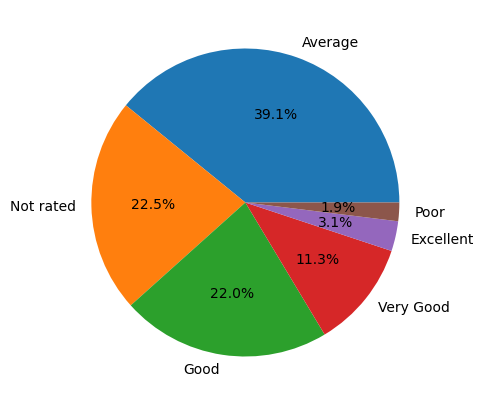

In [13]:
#plotting the text reviews on the pie chart
plt.figure(figsize=(7,5))
plt.pie(text_reviews.values,labels=text_reviews.index,autopct="%.1f%%",radius=1)
plt.show()

# Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [14]:
# Average review length calculation
df['Review Length'] = df['Rating text'].apply(lambda x: len(x.split()))
avg_review_length = round(df['Review Length'].mean(), 2)
print('Average Review Length:', avg_review_length)

Average Review Length: 1.34


In [15]:
# Analyzing review length vs. rating
review_len_vs_rating = df.groupby('Aggregate rating')['Review Length'].mean().to_dict()
print('Rating v/s Average Review Length:', review_len_vs_rating)

Rating v/s Average Review Length: {0.0: 2.0, 1.8: 1.0, 1.9: 1.0, 2.0: 1.0, 2.1: 1.0, 2.2: 1.0, 2.3: 1.0, 2.4: 1.0, 2.5: 1.0, 2.6: 1.0, 2.7: 1.0, 2.8: 1.0, 2.9: 1.0, 3.0: 1.0, 3.1: 1.0, 3.2: 1.0, 3.3: 1.0, 3.4: 1.0, 3.5: 1.0, 3.6: 1.0, 3.7: 1.0, 3.8: 1.0, 3.9: 1.0, 4.0: 2.0, 4.1: 2.0, 4.2: 2.0, 4.3: 2.0, 4.4: 2.0, 4.5: 1.0, 4.6: 1.0, 4.7: 1.0, 4.8: 1.0, 4.9: 1.0}


In [16]:
# Convert to DataFrame for better presentation
df_review_len_vs_rating = pd.DataFrame(
    list(review_len_vs_rating.items()), columns=['Rating', 'Average Review Length'])
print(df_review_len_vs_rating)

    Rating  Average Review Length
0      0.0                    2.0
1      1.8                    1.0
2      1.9                    1.0
3      2.0                    1.0
4      2.1                    1.0
5      2.2                    1.0
6      2.3                    1.0
7      2.4                    1.0
8      2.5                    1.0
9      2.6                    1.0
10     2.7                    1.0
11     2.8                    1.0
12     2.9                    1.0
13     3.0                    1.0
14     3.1                    1.0
15     3.2                    1.0
16     3.3                    1.0
17     3.4                    1.0
18     3.5                    1.0
19     3.6                    1.0
20     3.7                    1.0
21     3.8                    1.0
22     3.9                    1.0
23     4.0                    2.0
24     4.1                    2.0
25     4.2                    2.0
26     4.3                    2.0
27     4.4                    2.0
28     4.5    

In [17]:
# Correlation calculation
correlation = df['Review Length'].corr(df['Aggregate rating'])
print(f"Correlation between review length and rating: {correlation:.2f}")

Correlation between review length and rating: -0.60


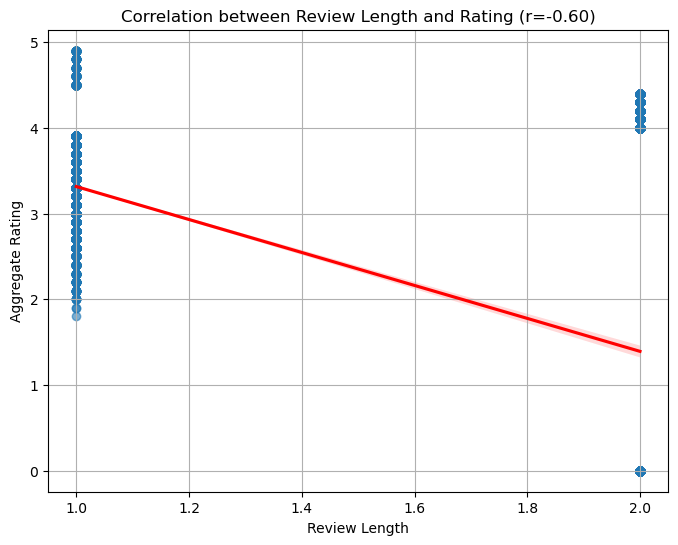

In [18]:
# Scatter plot with trendline
plt.figure(figsize=(8, 6))
sns.regplot(x='Review Length', y='Aggregate rating', data=df, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title(f'Correlation between Review Length and Rating (r={correlation:.2f})')
plt.xlabel('Review Length')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()

# Level 3:Task2

# Task: Votes Analysis

# 2:1 Identify the restaurants with the highest and lowest number of votes.

In [19]:
#Highest votes restaurants
highest_votes=df[df['Votes']==df['Votes'].max()]
highest_votes

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Review Length
728,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",...,No,No,No,No,4,4.8,Dark Green,Excellent,10934,1


In [20]:
#Lowset votes restaurants
lowest_votes=df[df['Votes']==df['Votes'].min()]
lowest_votes

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Review Length
69,6710645,Cantinho da Gula,30,S��o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, S��o P...",Itaim Bibi,"Itaim Bibi, S��o Paulo",-46.675667,-23.581000,Brazilian,...,No,No,No,No,2,0.0,White,Not rated,0,2
874,18433852,The Chaiwalas,1,Faridabad,"Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...",Badkal Lake,"Badkal Lake, Faridabad",77.300088,28.426284,Cafe,...,No,No,No,No,1,0.0,White,Not rated,0,2
879,18465871,Fusion Food Corner,1,Faridabad,"158/7, Opposite DDA Flat, Pul Pehlad Pur, Char...",Charmwood Village,"Charmwood Village, Faridabad",0.000000,0.000000,"North Indian, Chinese",...,No,No,No,No,1,0.0,White,Not rated,0,2
880,18472646,Punjabi Rasoi,1,Faridabad,"1, Deepak Complex, Eros Charmwood Village, Far...",Charmwood Village,"Charmwood Village, Faridabad",77.292431,28.492325,North Indian,...,No,No,No,No,1,0.0,White,Not rated,0,2
887,18471268,Baskin Robbin,1,Faridabad,"Ground Floor, Crown Interiorz Mall, Sector 35,...","Crown Interiorz Mall, Sector 35, Faridabad","Crown Interiorz Mall, Sector 35, Faridabad, Fa...",77.307448,28.469594,Desserts,...,No,No,No,No,1,0.0,White,Not rated,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,18486858,6 Packs Momos,1,Noida,"Spice World Mall, Sector 25, Noida","Spice World Mall, Sector 25","Spice World Mall, Sector 25, Noida",77.340602,28.586000,Chinese,...,No,No,No,No,1,0.0,White,Not rated,0,2
9098,18431152,Cafe' Wow,1,Noida,"Food Court, 3rd Floor, The Great India Palace ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.325600,28.567514,Fast Food,...,No,No,No,No,1,0.0,White,Not rated,0,2
9099,18439721,Chef's Basket Pop Up Caf��,1,Noida,"Inside Big Bazaar, The Great India Place, Sect...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",0.000000,0.000000,"Italian, Chinese",...,No,No,No,No,1,0.0,White,Not rated,0,2
9103,18428504,The Hangout-Deli,1,Noida,"320-A, 3rd Floor, The Great India Place Mall, ...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.323213,28.567751,"Continental, Lebanese, Mexican",...,Yes,No,No,No,3,0.0,White,Not rated,0,2


# 2:2 Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [21]:
correlation=df['Votes'].corr(df['Aggregate rating'])
print("Correlation Between Votes and Rating:",correlation)

Correlation Between Votes and Rating: 0.3134741803250006


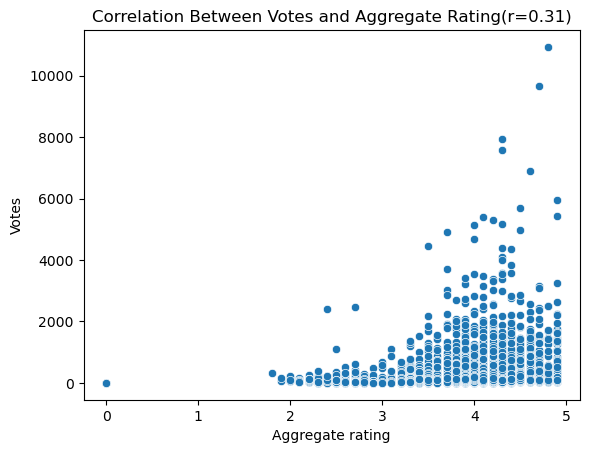

In [22]:
sns.scatterplot(x=df['Aggregate rating'],y=df['Votes'])
plt.title(f'Correlation Between Votes and Aggregate Rating(r={correlation:.2f})')
plt.show()

# Level3:Task3

# Task: Price Range vs. Online Delivery and Table Booking

# 3:1 Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [23]:
# Using pivot_table
online_delivery_pivot = df.pivot_table(index='Price range', columns='Has Online delivery', aggfunc='size', fill_value=0)
table_booking_pivot = df.pivot_table(index='Price range', columns='Has Table booking', aggfunc='size', fill_value=0)
print(online_delivery_pivot)
print()
print(table_booking_pivot)

Has Online delivery    No   Yes
Price range                    
1                    3737   701
2                    1827  1286
3                     994   411
4                     533    53

Has Table booking    No  Yes
Price range                 
1                  4437    1
2                  2874  239
3                   761  644
4                   312  274


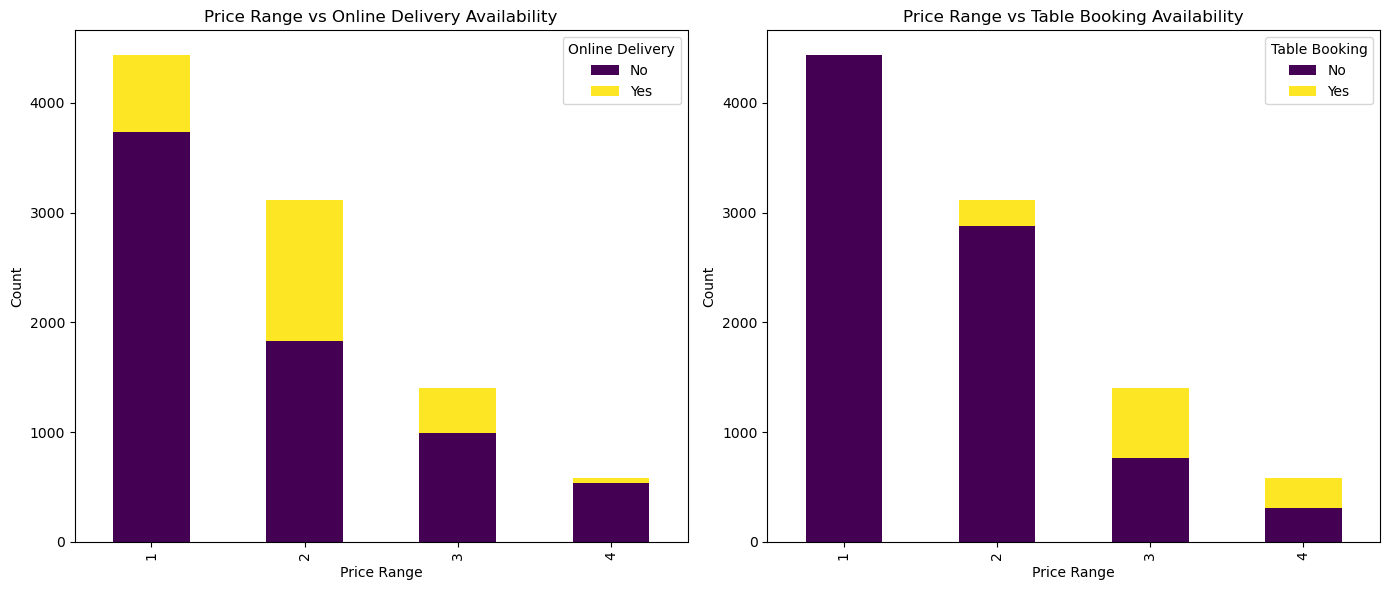

In [24]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Online Delivery Plot
online_delivery_pivot.plot(kind='bar', stacked=True, ax=axes[0],cmap='viridis')
axes[0].set_title('Price Range vs Online Delivery Availability')
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Count')
axes[0].legend(title='Online Delivery')

# Table Booking Plot
table_booking_pivot.plot(kind='bar', stacked=True, ax=axes[1], cmap='viridis')
axes[1].set_title('Price Range vs Table Booking Availability')
axes[1].set_xlabel('Price Range')
axes[1].set_ylabel('Count')
axes[1].legend(title='Table Booking')

plt.tight_layout()
plt.show()

# 3:2 Determine if higher-priced restaurants are more likely to offer these services.

In [25]:
# Determine median price range
median_price = df['Price range'].median()
median_price

2.0

In [26]:
# Split dataset into High-Priced 
hpr = df[df['Price range'] > median_price]  # Higher-priced restaurants
hpr

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Review Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,1
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,2
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,1
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,5915054,Baltazar,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, K۱l۱�_ ...",Karak�_y,"Karak�_y, ��stanbul",28.981103,41.025785,"Burger, Izgara",...,No,No,No,No,3,4.3,Green,Very Good,870,2
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,2
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,2
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,1


In [27]:
# Counting high-priced restaurants offering Online Delivery and Table Booking
hpr_vs_onlinedelivery = hpr['Has Online delivery'].value_counts()
hpr_vs_tablebooking = hpr['Has Table booking'].value_counts()

# Print the values
print("\nHigh-Priced Restaurants vs Online Delivery:")
print(hpr_vs_onlinedelivery)
print("\nHigh-Priced Restaurants vs Table Booking:")
print(hpr_vs_tablebooking)


High-Priced Restaurants vs Online Delivery:
Has Online delivery
No     1527
Yes     464
Name: count, dtype: int64

High-Priced Restaurants vs Table Booking:
Has Table booking
No     1073
Yes     918
Name: count, dtype: int64


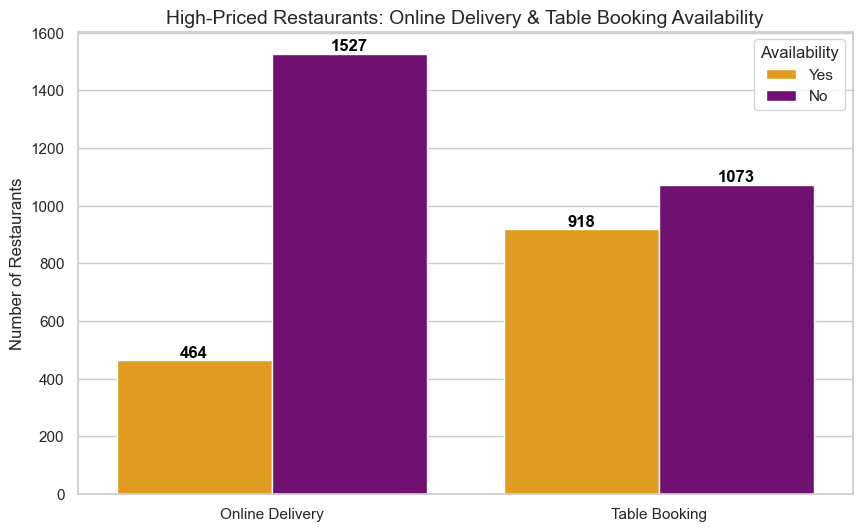

In [28]:
# Ensure both categories (Yes/No) exist to prevent errors
online_delivery_counts = [hpr_vs_onlinedelivery.get('Yes', 0), hpr_vs_onlinedelivery.get('No', 0)]
table_booking_counts = [hpr_vs_tablebooking.get('Yes', 0), hpr_vs_tablebooking.get('No', 0)]

# Create a DataFrame for Visualization
plot_data = pd.DataFrame({
    'Service': ['Online Delivery', 'Online Delivery', 'Table Booking', 'Table Booking'],
    'Availability': ['Yes', 'No', 'Yes', 'No'],
    'Count': [online_delivery_counts[0], online_delivery_counts[1], table_booking_counts[0], table_booking_counts[1]]
})

# Set seaborn style
sns.set_theme(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=plot_data, x="Service", y="Count", hue="Availability", palette=["orange", "purple"])

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title("High-Priced Restaurants: Online Delivery & Table Booking Availability", fontsize=14)
plt.xlabel("")
plt.ylabel("Number of Restaurants", fontsize=12)
plt.legend(title="Availability")
plt.show()